<a href="https://colab.research.google.com/github/Rifaul31/Sepsis-Case-Preprocessing/blob/main/Assessment_1_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 4
- Nur Ahsar Setyiowen (1301180506)
- Meizan Arthur Alfianto (1301194178)
- Aulia Rahman Arif Wahyudi (1301194195)
- Rizqi Khoir Y (1301194266)

Dataset used : 

https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639/1?file=24061976

-

Dataset Attributes:

Data attributes consist of Case ID, 16 various activities, the timestamps of the activity, the variants of the sepsis disease, the lifecycle of the activity, the group in charge of the activity, the results of medical testing, and information that comes from checklists.




# Step 1 : Data Overview

Initialization

In [ ]:
# Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rifaul31/Sepsis-Case-Preprocessing/main/Sepsis%20Cases%20-%20Event%20Log.csv', header = 0, parse_dates=True)
data.head()

,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,63,complete,A,True,True,True,True,True,True,True,True,85.0,True,False,False,False,True,True,True,True,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,63,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15214 entries, 0 to 15213
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Case ID                    15190 non-null  object 
 1   Activity                   15214 non-null  object 
 2   Complete Timestamp         15214 non-null  object 
 3   Variant                    15214 non-null  object 
 4   Variant index              15214 non-null  int64  
 5   lifecycle:transition       15214 non-null  object 
 6   org:group                  15214 non-null  object 
 7   InfectionSuspected         1050 non-null   object 
 8   DiagnosticBlood            1050 non-null   object 
 9   DisfuncOrg                 1050 non-null   object 
 10  SIRSCritTachypnea          1050 non-null   object 
 11  Hypotensie                 1050 non-null   object 
 12  SIRSCritHeartRate          1050 non-null   object 
 13  Infusion                   1050 non-null   obj

Computing the number of Objects and Attributes

In [ ]:
# Computing the number of Cases and Events
case = data.groupby('Case ID')['Case ID'].nunique()
print ("There are %d number of Case IDd and %d number of Events" %(case.count(), data.shape[0]))

There are 1049 number of Case IDd and 15214 number of Events


In [ ]:
dup = data.duplicated().sum()
print ("There are %d number of duplicates" %(dup))
data.loc[data.duplicated(), :]

There are 1 number of duplicates


,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
7161,ES,Leucocytes,2014-11-08 11:50:00.000,Variant 435,435,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,NaN,NaN


Frequency of an Attribute Value (In Percentage)

In [ ]:
# Frequency of an attribute value (In Percentage)
col = data.columns
for i in col:
  print("\n---------------------------------------")
  print("\nPercentage of %s" %(i))
  print(data[i].value_counts(normalize=True) * 100)


---------------------------------------

Percentage of Case ID
NGA    1.217907
KM     1.119157
OD     0.776827
GK     0.579329
YX     0.552995
         ...   
MF     0.019750
P      0.019750
VMA    0.019750
HU     0.019750
LNA    0.019750
Name: Case ID, Length: 1049, dtype: float64

---------------------------------------

Percentage of Activity
Leucocytes          22.236098
CRP                 21.440778
LacticAcid           9.635862
Admission NC         7.769160
ER Triage            6.921257
ER Registration      6.901538
ER Sepsis Triage     6.894965
IV Antibiotics       5.409491
IV Liquid            4.949389
Release A            4.410411
Return ER            1.932431
Admission IC         0.769029
Release B            0.368082
Release C            0.164322
Release D            0.157749
Release E            0.039437
Name: Activity, dtype: float64

---------------------------------------

Percentage of Complete Timestamp
2014-08-25 13:00:00.000    0.111739
2014-04-20 14:00:00.000    0.

Statistical Description

In [ ]:
# Statistical Description
data.describe()

,Variant index,Age,Leucocytes,CRP,LacticAcid
count,15214.000000,1050.000000,3361.00000,3123.000000,1454.000000
mean,399.948863,70.080952,12.94936,113.745757,1.949106
std,256.580963,17.356744,14.99533,86.775355,1.478633
min,1.000000,20.000000,0.20000,5.000000,0.200000
25%,174.000000,60.000000,7.70000,43.000000,1.100000
50%,393.000000,75.000000,11.00000,95.000000,1.600000
75%,622.000000,85.000000,15.00000,162.000000,2.300000
max,846.000000,90.000000,381.30000,573.000000,14.900000


Summary Data Plots

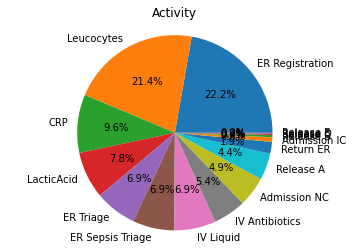

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe839813910>,
      dtype=object)

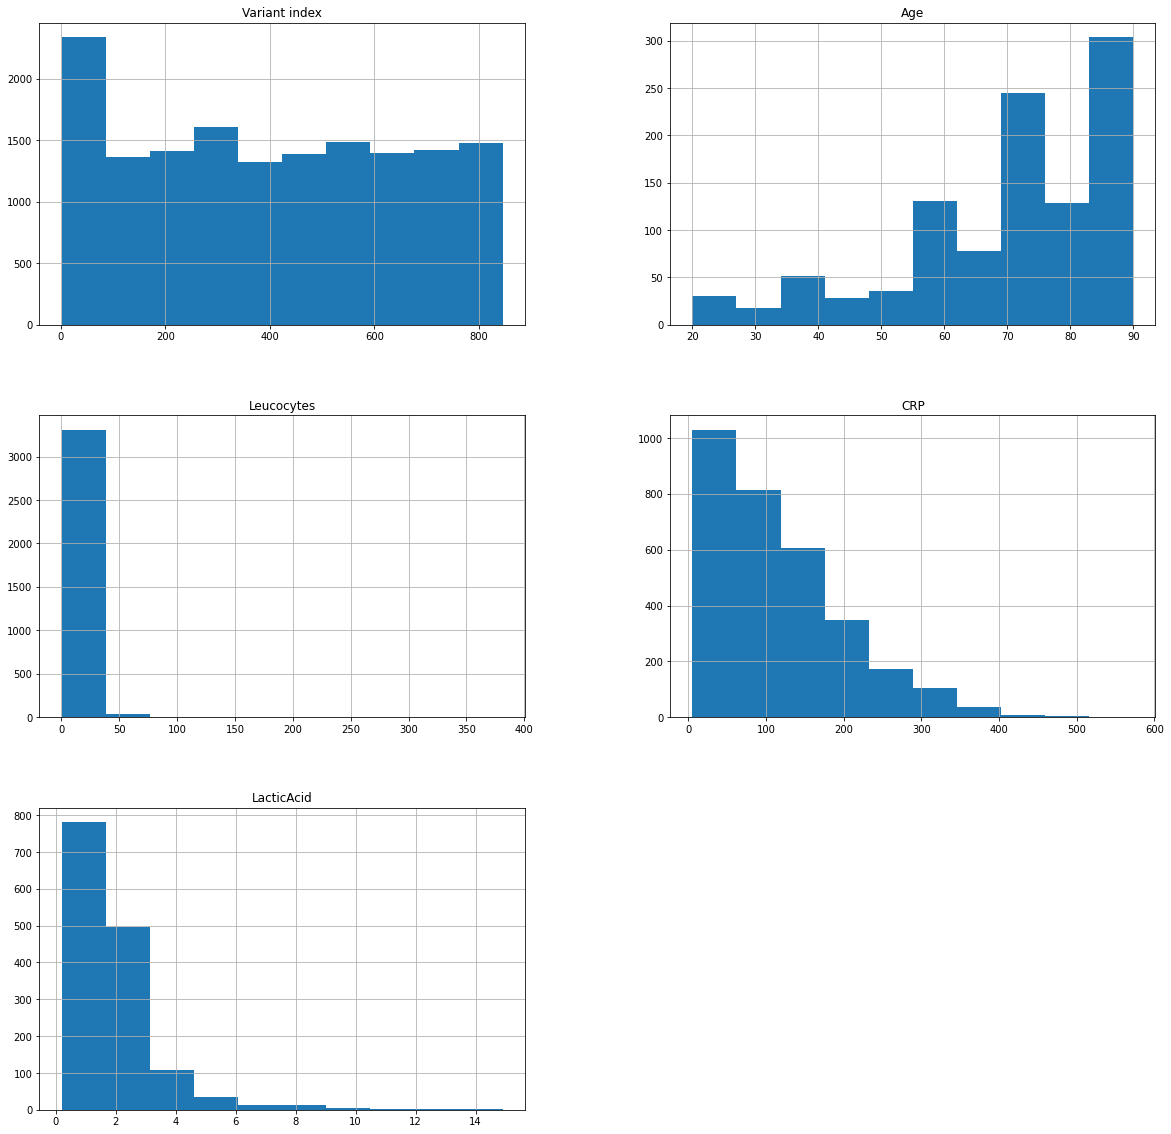

In [ ]:
my_labels = list(data['Activity'].unique())
plt.pie(data['Activity'].value_counts(),labels=my_labels,autopct='%1.1f%%')
plt.title('Activity')
plt.axis('equal')
plt.show()
print("\n")

display(data[col].hist(figsize=(20, 20)))


Data Quality Issues:
```
1. The attributes Variant and Index Variant both have the same values;
2. The values in lifecycle attributes are all the same, making them redundant;
3. There are missing values in attribute org:group;
4. We want to focus on the process of the Sepsis Cases; therefore, the result of the tests (e.g., Leucocytes, CRP) seems irrelevant;
5. There is one duplicated value found. 

```



# Step 2 : Pre Processing Approach

The Preprocessing approach that we use are:
- Data Cleaning
- Dimensionality Reduction
- Aggregation

Expected Outcomes:
- The machine reads case id 'NA' as empty values. Thus the missing values in 'Case ID' are filled with 'NA'
- The attribute 'Variant' and 'Variant index' is aggregated;
- Irrelevent and Redudndant Attributes are dropped (InfectionSuspected - LacticAcid);
- In “org:group” attributes, the record “?” changed into “Z” since there is no record “Z” but we have record A-Y;
- The duplicated data are removed.


# Step 3 : Pre Processing Implementation

In [ ]:
# Copying data to be preprocessed
new_data = data
new_data.head()

,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,63,complete,A,True,True,True,True,True,True,True,True,85.0,True,False,False,False,True,True,True,True,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,63,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking the missing values in the data
nan = new_data['Case ID'].isna().sum()
print ("There are %d missing values in Case ID" %(nan))
new_data.loc[new_data['Case ID'].isna(), :]

There are 24 missing values in Case ID


,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
441,NaN,ER Registration,2014-11-10 07:45:19.000,Variant 91,91,complete,A,True,True,True,True,True,True,True,True,90.0,True,False,False,False,True,True,True,True,True,True,True,C,True,True,True,NaN,NaN,NaN
442,NaN,ER Triage,2014-11-10 07:50:10.000,Variant 91,91,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,ER Sepsis Triage,2014-11-10 07:53:38.000,Variant 91,91,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,NaN,IV Antibiotics,2014-11-10 07:54:36.000,Variant 91,91,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,NaN,IV Liquid,2014-11-10 08:03:14.000,Variant 91,91,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,Leucocytes,2014-11-10 08:23:00.000,Variant 91,91,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,NaN,NaN
447,NaN,CRP,2014-11-10 08:23:00.000,Variant 91,91,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN
448,NaN,LacticAcid,2014-11-10 08:23:00.000,Variant 91,91,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
449,NaN,Admission NC,2014-11-10 10:37:38.000,Variant 91,91,complete,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,NaN,Admission NC,2014-11-10 20:30:00.000,Variant 91,91,complete,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replacing missing values with new Case ID
new_data['Case ID'] = new_data['Case ID'].fillna('NA')
nan = new_data['Case ID'].isna().sum()
print ("There are %d missing values in Case ID" %(nan))

There are 0 missing values in Case ID


In [ ]:
# Droppping Duplicates table
new_data.drop_duplicates(keep = False, inplace = True)
dup = new_data.duplicated().sum()
print ("There are %d number of duplicates" %(dup))
new_data.loc[new_data.duplicated(), :]

There are 0 number of duplicates


,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid


In [ ]:
case = new_data.groupby('Case ID')['Case ID'].nunique()
print ("There are %d number of Case ID and %d number of Events" %(case.count(), new_data.shape[0]))

There are 1050 number of Case ID and 15212 number of Events


In [ ]:
# Checking the missing values in org:group
print(new_data['org:group'].unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' '?' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q'
 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y']


In [ ]:
# Replacing the missing values with new Values
new_data['org:group'] = new_data['org:group'].replace(['?'], ['Z']) 
print(new_data['org:group'].unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'Z' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q'
 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y']


In [ ]:
# Dropping irrelevant column from table
new_data.drop(new_data.iloc[:, 7:34], axis = 1, inplace = True)
new_data.drop(new_data.columns[[5]], axis = 1, inplace = True)
new_data.head()

,Case ID,Activity,Complete Timestamp,Variant,Variant index,org:group
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,63,A
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,63,B
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,63,B
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,63,B
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,63,C


In [ ]:
# Aggregating Variant Index and Variant by dropping variant column
new_data.drop(new_data.columns[[3]], axis = 1, inplace = True)
new_data.head()

,Case ID,Activity,Complete Timestamp,Variant index,org:group
0,A,ER Registration,2014-10-22 16:15:41.000,63,A
1,A,Leucocytes,2014-10-22 16:27:00.000,63,B
2,A,CRP,2014-10-22 16:27:00.000,63,B
3,A,LacticAcid,2014-10-22 16:27:00.000,63,B
4,A,ER Triage,2014-10-22 16:33:37.000,63,C


# Step 4 : Evidence and Evaluation

In [ ]:
new_data.head()

,Case ID,Activity,Complete Timestamp,Variant index,org:group
0,A,ER Registration,2014-10-22 16:15:41.000,63,A
1,A,Leucocytes,2014-10-22 16:27:00.000,63,B
2,A,CRP,2014-10-22 16:27:00.000,63,B
3,A,LacticAcid,2014-10-22 16:27:00.000,63,B
4,A,ER Triage,2014-10-22 16:33:37.000,63,C


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15212 entries, 0 to 15213
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Case ID             15212 non-null  object
 1   Activity            15212 non-null  object
 2   Complete Timestamp  15212 non-null  object
 3   Variant index       15212 non-null  int64 
 4   org:group           15212 non-null  object
dtypes: int64(1), object(4)
memory usage: 713.1+ KB


In [ ]:
case = new_data.groupby('Case ID')['Case ID'].nunique()
print ("There are %d number of Case ID and %d number of Events" %(case.count(), data.shape[0]))

There are 1050 number of Case ID and 15212 number of Events


In [ ]:
# Frequency of an attribute value (In Percentage)
col = new_data.columns
for i in col:
  print("\n---------------------------------------")
  print("\nPercentage of %s" %(i))
  print(new_data[i].value_counts(normalize=True) * 100)


---------------------------------------

Percentage of Case ID
NGA    1.216145
KM     1.117539
OD     0.775703
GK     0.578491
YX     0.552196
         ...   
P      0.019721
HU     0.019721
LY     0.019721
NAA    0.019721
HMA    0.019721
Name: Case ID, Length: 1050, dtype: float64

---------------------------------------

Percentage of Activity
Leucocytes          22.225874
CRP                 21.443597
LacticAcid           9.637129
Admission NC         7.770181
ER Triage            6.922167
ER Registration      6.902445
ER Sepsis Triage     6.895872
IV Antibiotics       5.410202
IV Liquid            4.950039
Release A            4.410991
Return ER            1.932685
Admission IC         0.769130
Release B            0.368130
Release C            0.164344
Release D            0.157770
Release E            0.039443
Name: Activity, dtype: float64

---------------------------------------

Percentage of Complete Timestamp
2014-08-25 13:00:00.000    0.111754
2014-04-20 14:00:00.000    0.

In [ ]:
new_data.to_csv('Event Logs.csv', index=False)